<a href="https://colab.research.google.com/github/Masuzyo/Thrivesummer/blob/main/Project_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.stats.api as sms
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
# Load the California housing dataset
print("Loading California Housing Dataset...")
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

# Combine features and target for easier analysis
df = pd.concat([X, y], axis=1)
print(f"Dataset shape: {df.shape}")
print(f"Features: {list(housing.feature_names)}")
print(f"Target: {housing.target_names[0]}")

Loading California Housing Dataset...
Dataset shape: (20640, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: MedHouseVal


In [ ]:
# ===============================
# 1. DESCRIPTIVE STATISTICS
# ===============================
print("\n" + "="*50)
print("1. DESCRIPTIVE STATISTICS")
print("="*50)

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Check for missing values
print(f"\nMissing values:\n{df.isnull().sum()}")

# Data types
print(f"\nData types:\n{df.dtypes}")

# Correlation matrix
correlation_matrix = df.corr()
print(f"\nCorrelation with target variable:")
target_corr = correlation_matrix['MedHouseVal'].sort_values(ascending=False)
print(target_corr)


1. DESCRIPTIVE STATISTICS

Basic Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532   


2. CREATING VISUALIZATIONS


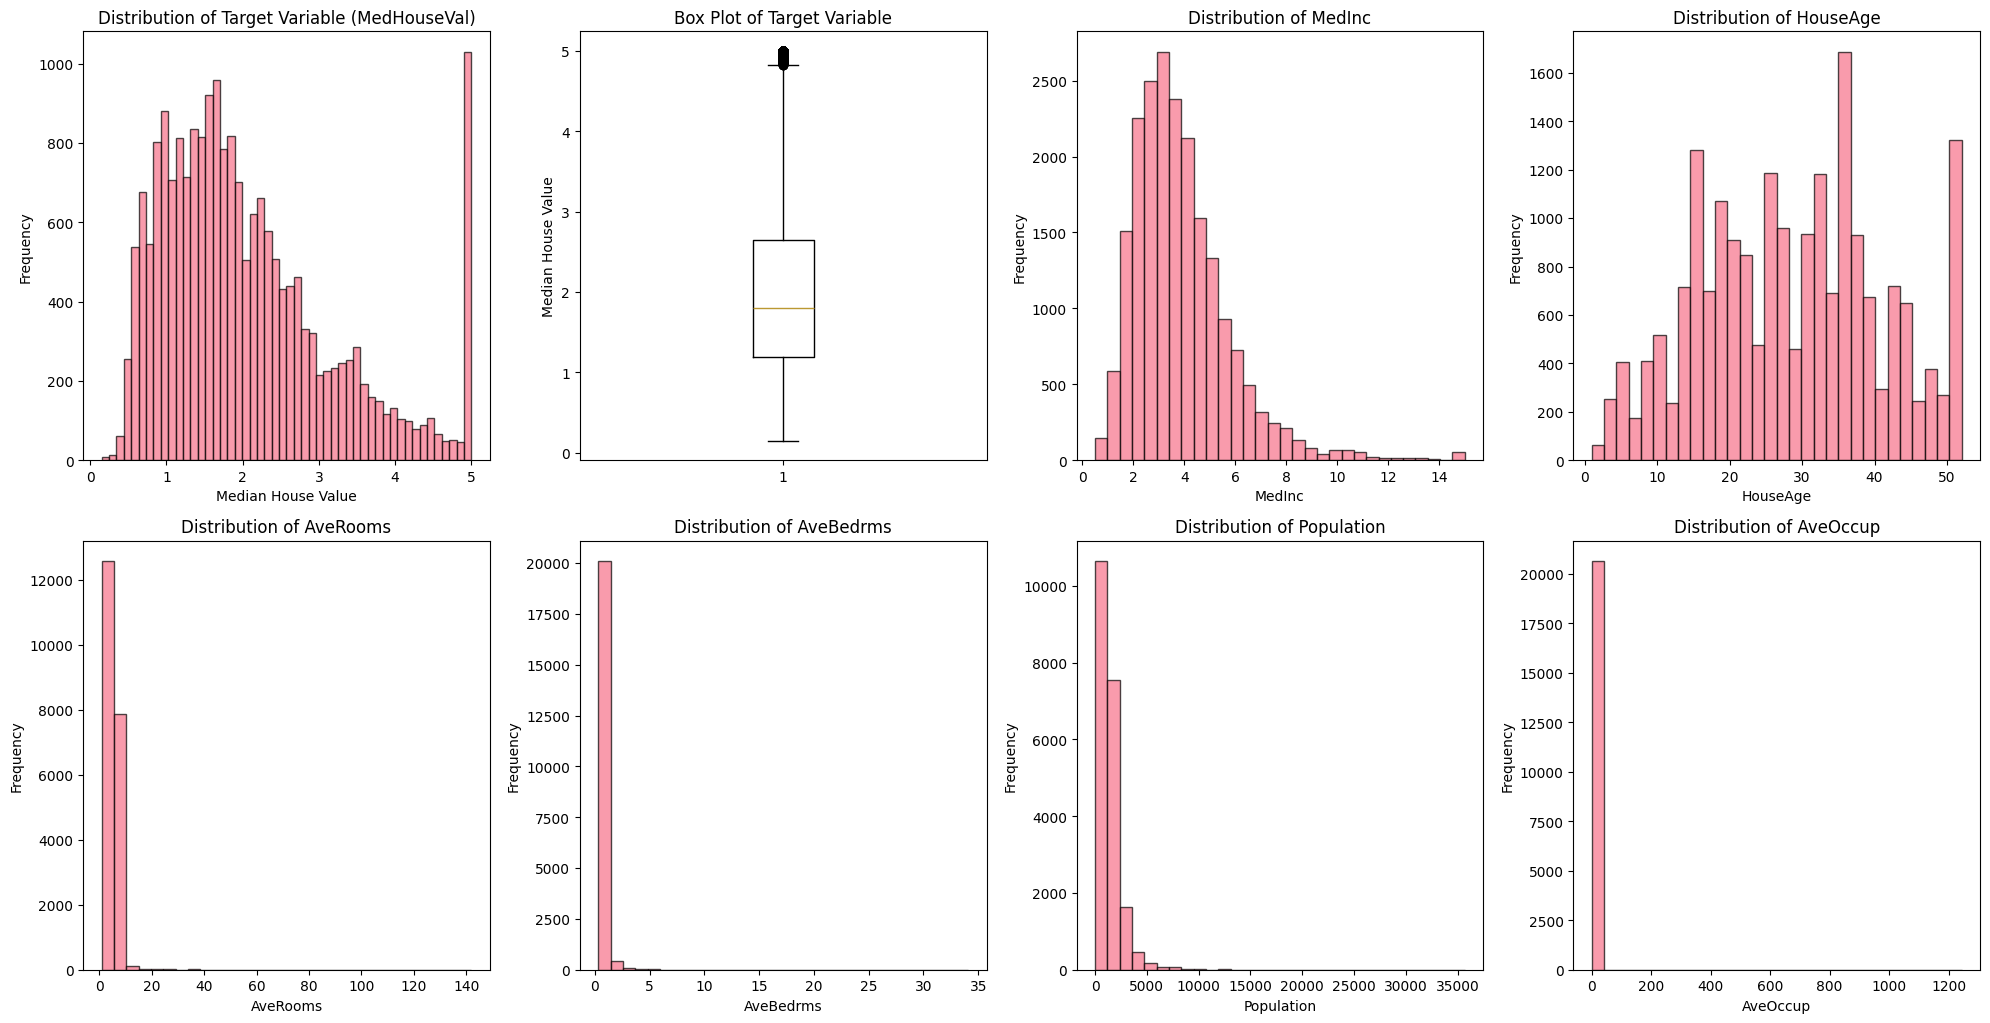

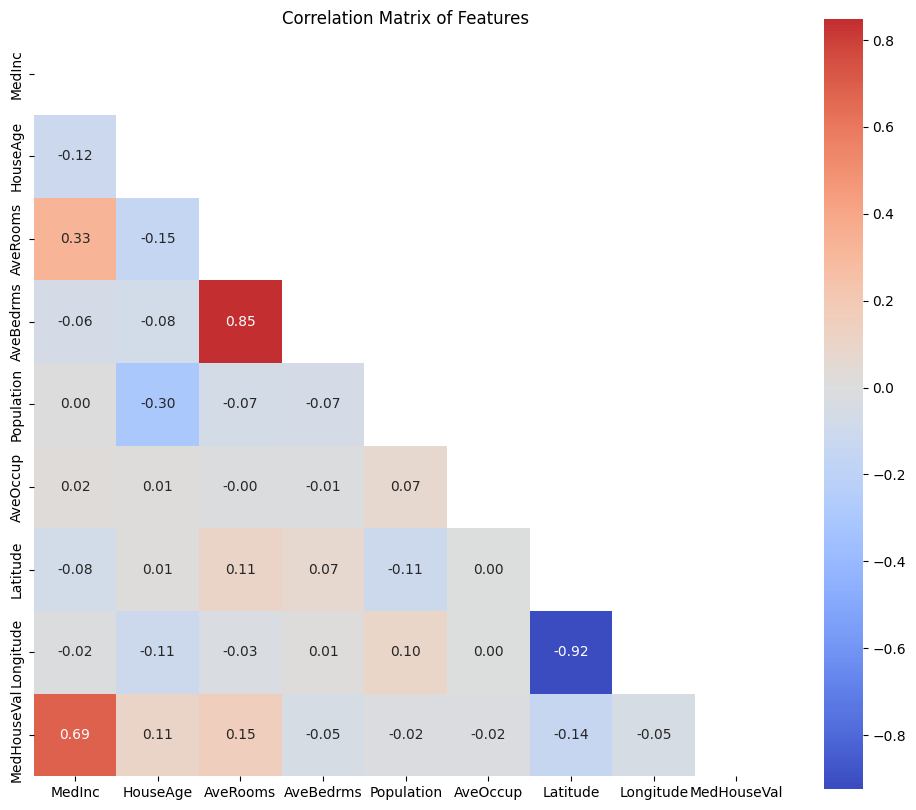

Creating pair plot (using 5000 samples for performance)...


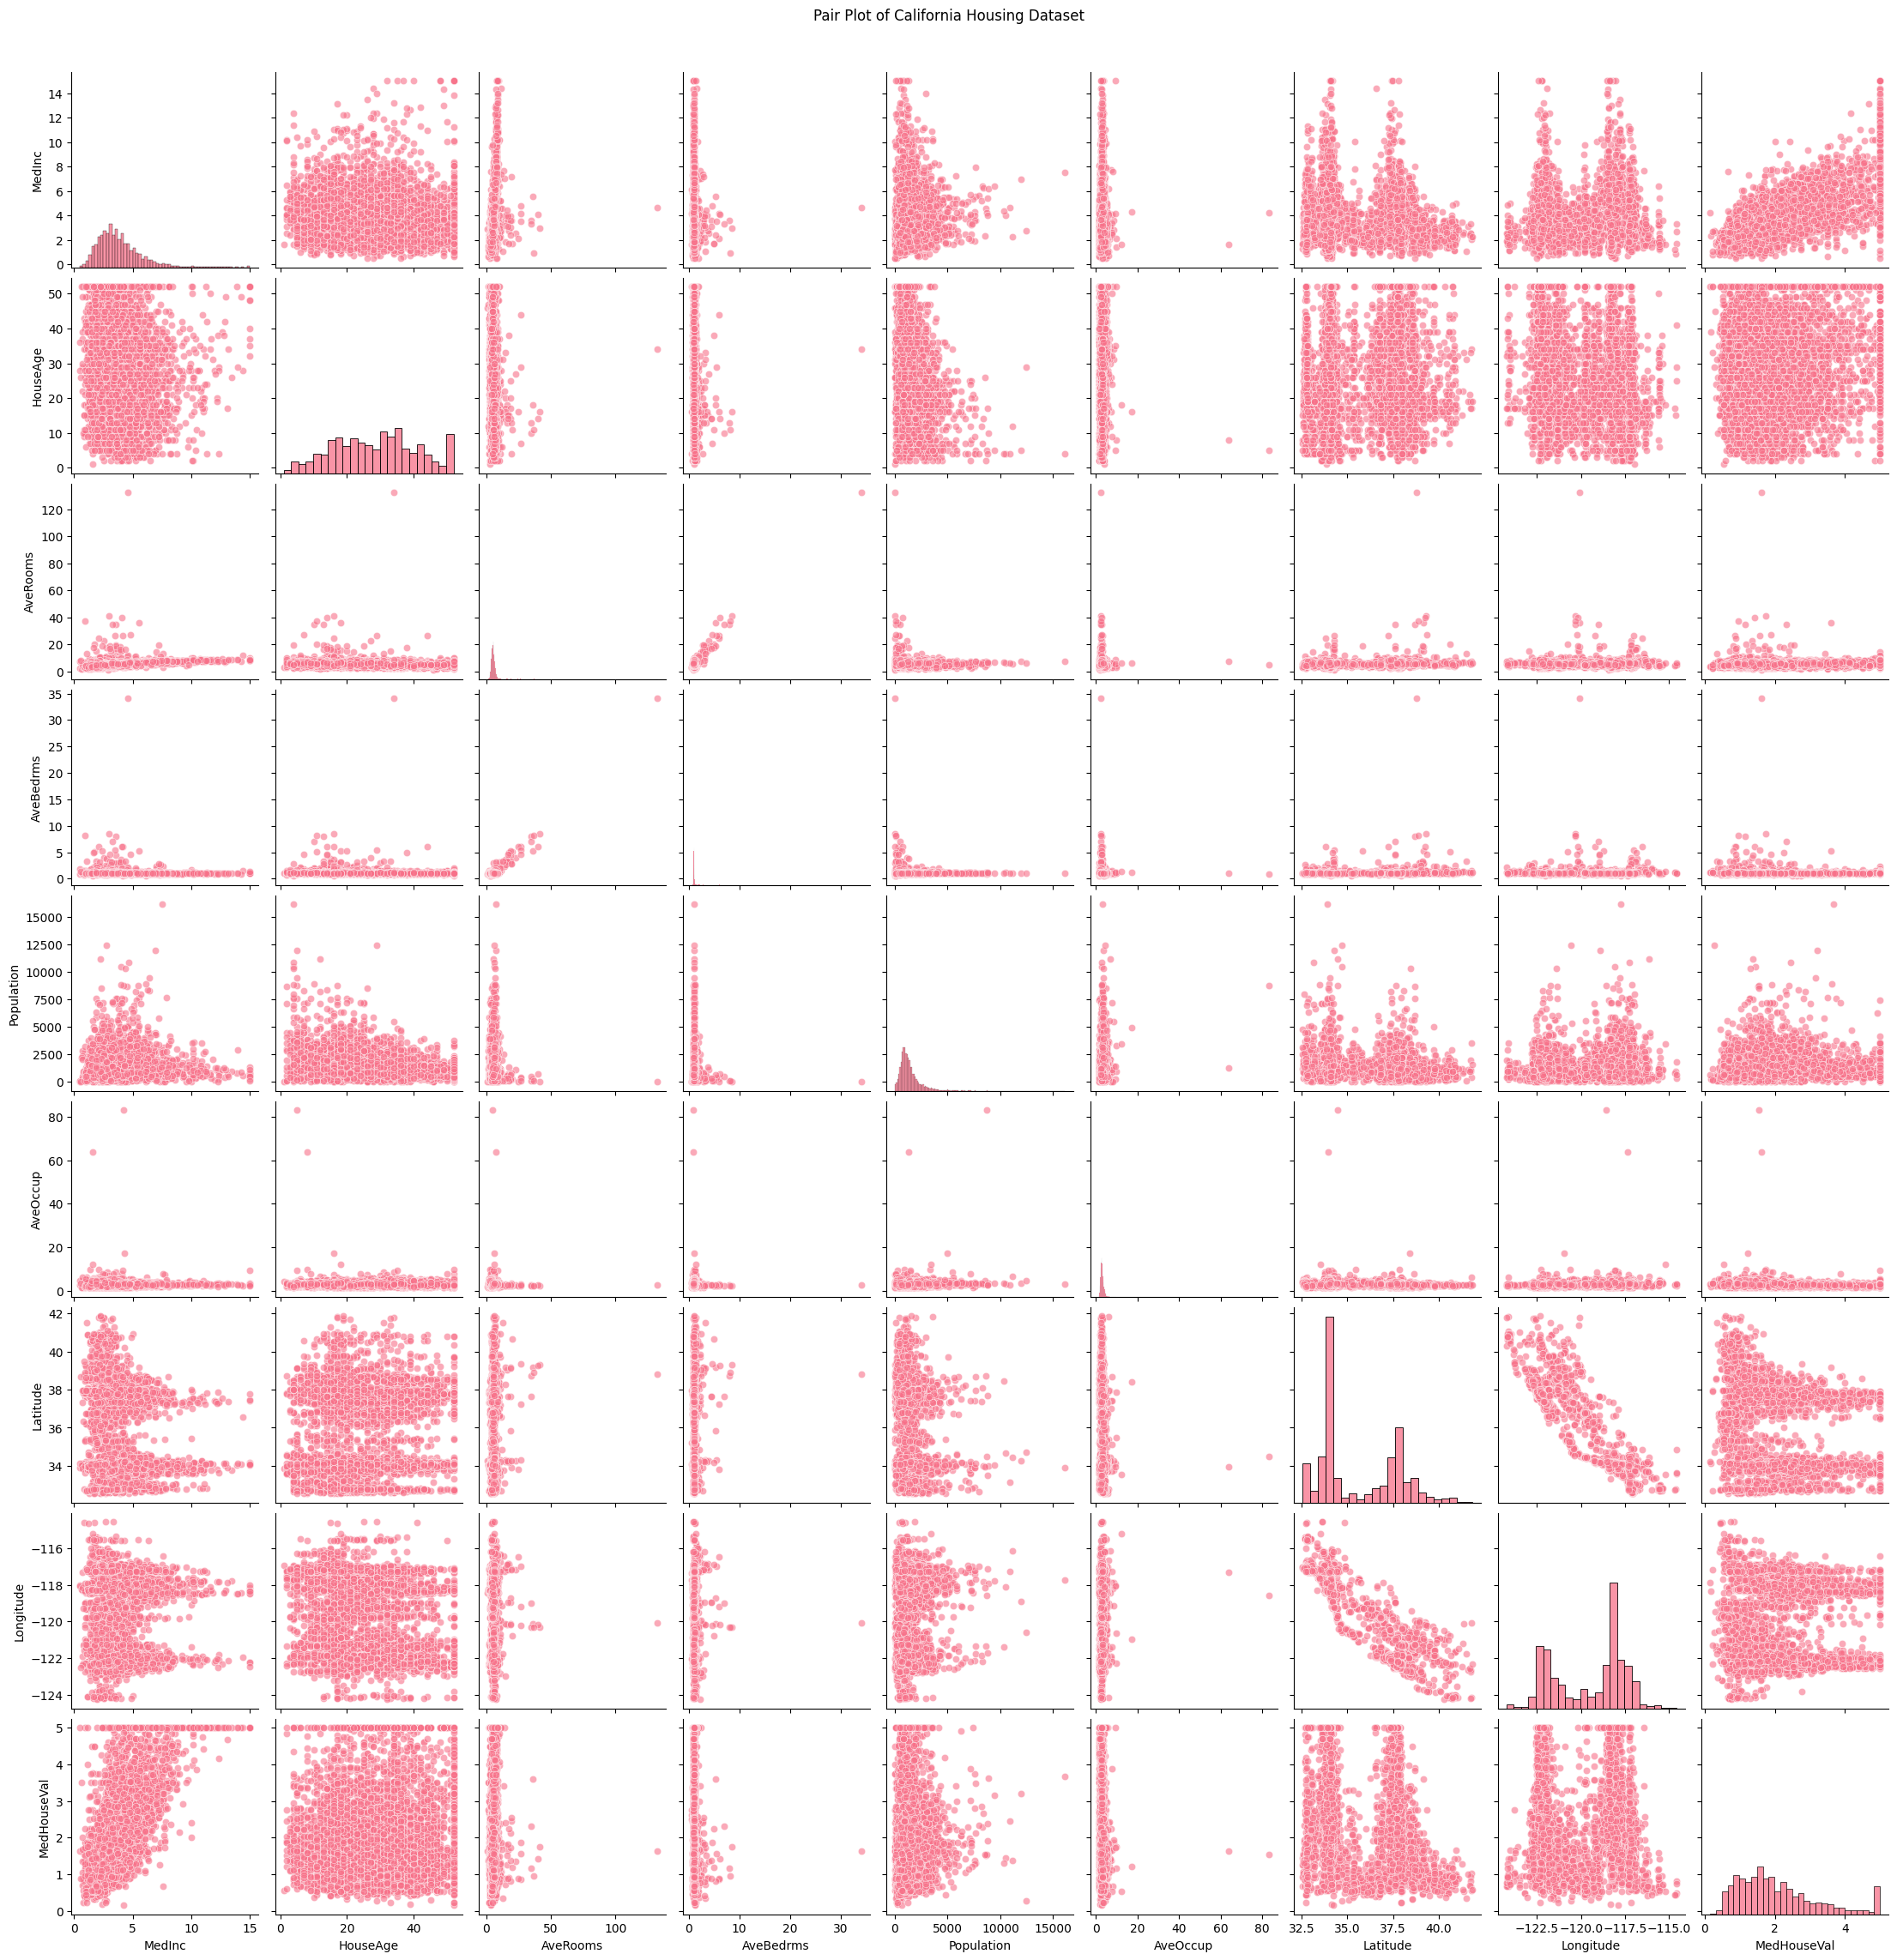

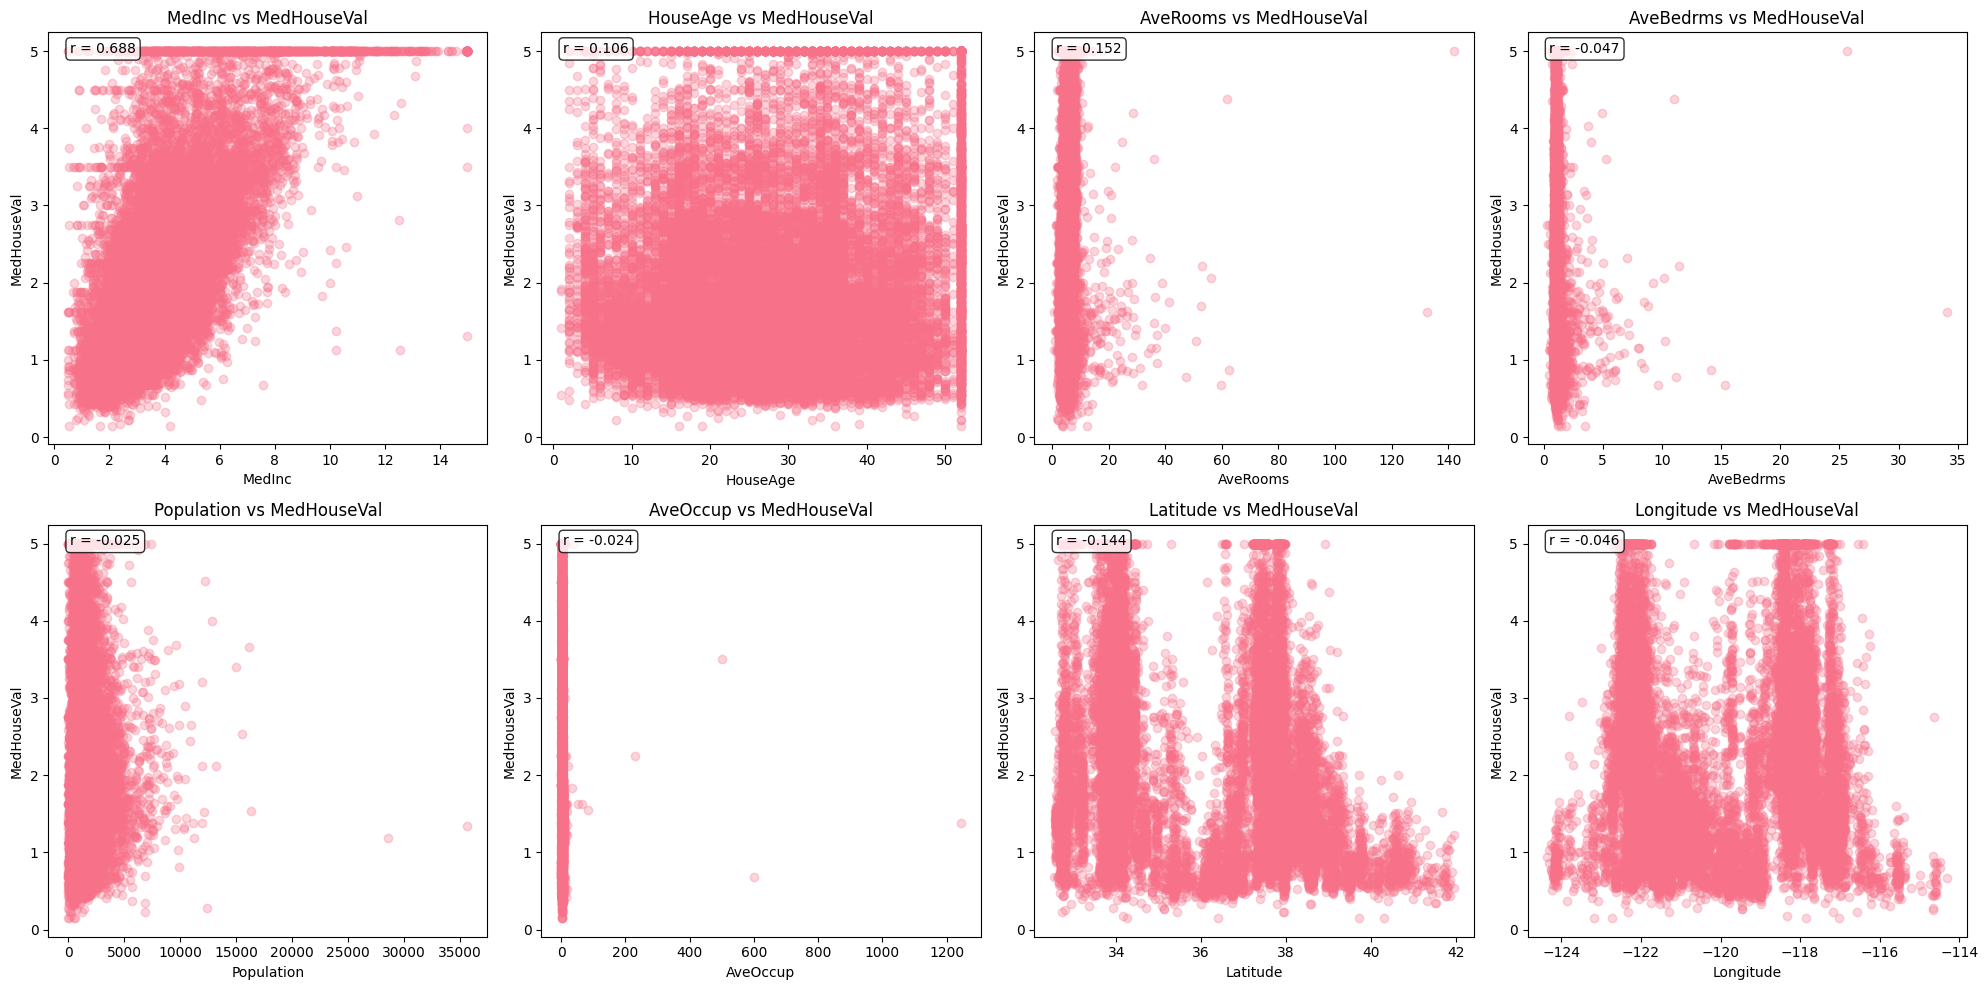

In [ ]:
# ===============================
# 2. VISUALIZATIONS
# ===============================
print("\n" + "="*50)
print("2. CREATING VISUALIZATIONS")
print("="*50)

# Set up the plotting
fig = plt.figure(figsize=(20, 15))

# 2.1 Distribution of target variable
plt.subplot(3, 4, 1)
plt.hist(y, bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of Target Variable (MedHouseVal)')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

# 2.2 Box plot of target variable
plt.subplot(3, 4, 2)
plt.boxplot(y)
plt.title('Box Plot of Target Variable')
plt.ylabel('Median House Value')

# 2.3 Feature distributions
for i, col in enumerate(X.columns[:6]):
    plt.subplot(3, 4, i+3)
    plt.hist(df[col], bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2.4 Correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, mask=mask, fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

# 2.5 Pair plot (using a sample for performance)
print("Creating pair plot (using 5000 samples for performance)...")
sample_df = df.sample(n=5000, random_state=42)
sns.pairplot(sample_df, diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of California Housing Dataset', y=1.02)
plt.show()

# 2.6 Feature vs Target scatter plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(X.columns):
    axes[i].scatter(df[col], y, alpha=0.3)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('MedHouseVal')
    axes[i].set_title(f'{col} vs MedHouseVal')

    # Add correlation coefficient
    corr_coef = df[col].corr(y)
    axes[i].text(0.05, 0.95, f'r = {corr_coef:.3f}',
                transform=axes[i].transAxes, bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [ ]:
# ===============================
# 3. PREPARE FOR LINEAR REGRESSION
# ===============================
print("\n" + "="*50)
print("3. PREPARING FOR LINEAR REGRESSION")
print("="*50)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


3. PREPARING FOR LINEAR REGRESSION
Training set size: 16512
Test set size: 4128


In [ ]:
# Fit linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = lr_model.predict(X_train_scaled)
y_pred_test = lr_model.predict(X_test_scaled)

# Calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

print(f"Training R² score: {lr_model.score(X_train_scaled, y_train):.4f}")
print(f"Test R² score: {lr_model.score(X_test_scaled, y_test):.4f}")

Training R² score: 0.6126
Test R² score: 0.5758



4. CHECKING LINEAR REGRESSION ASSUMPTIONS


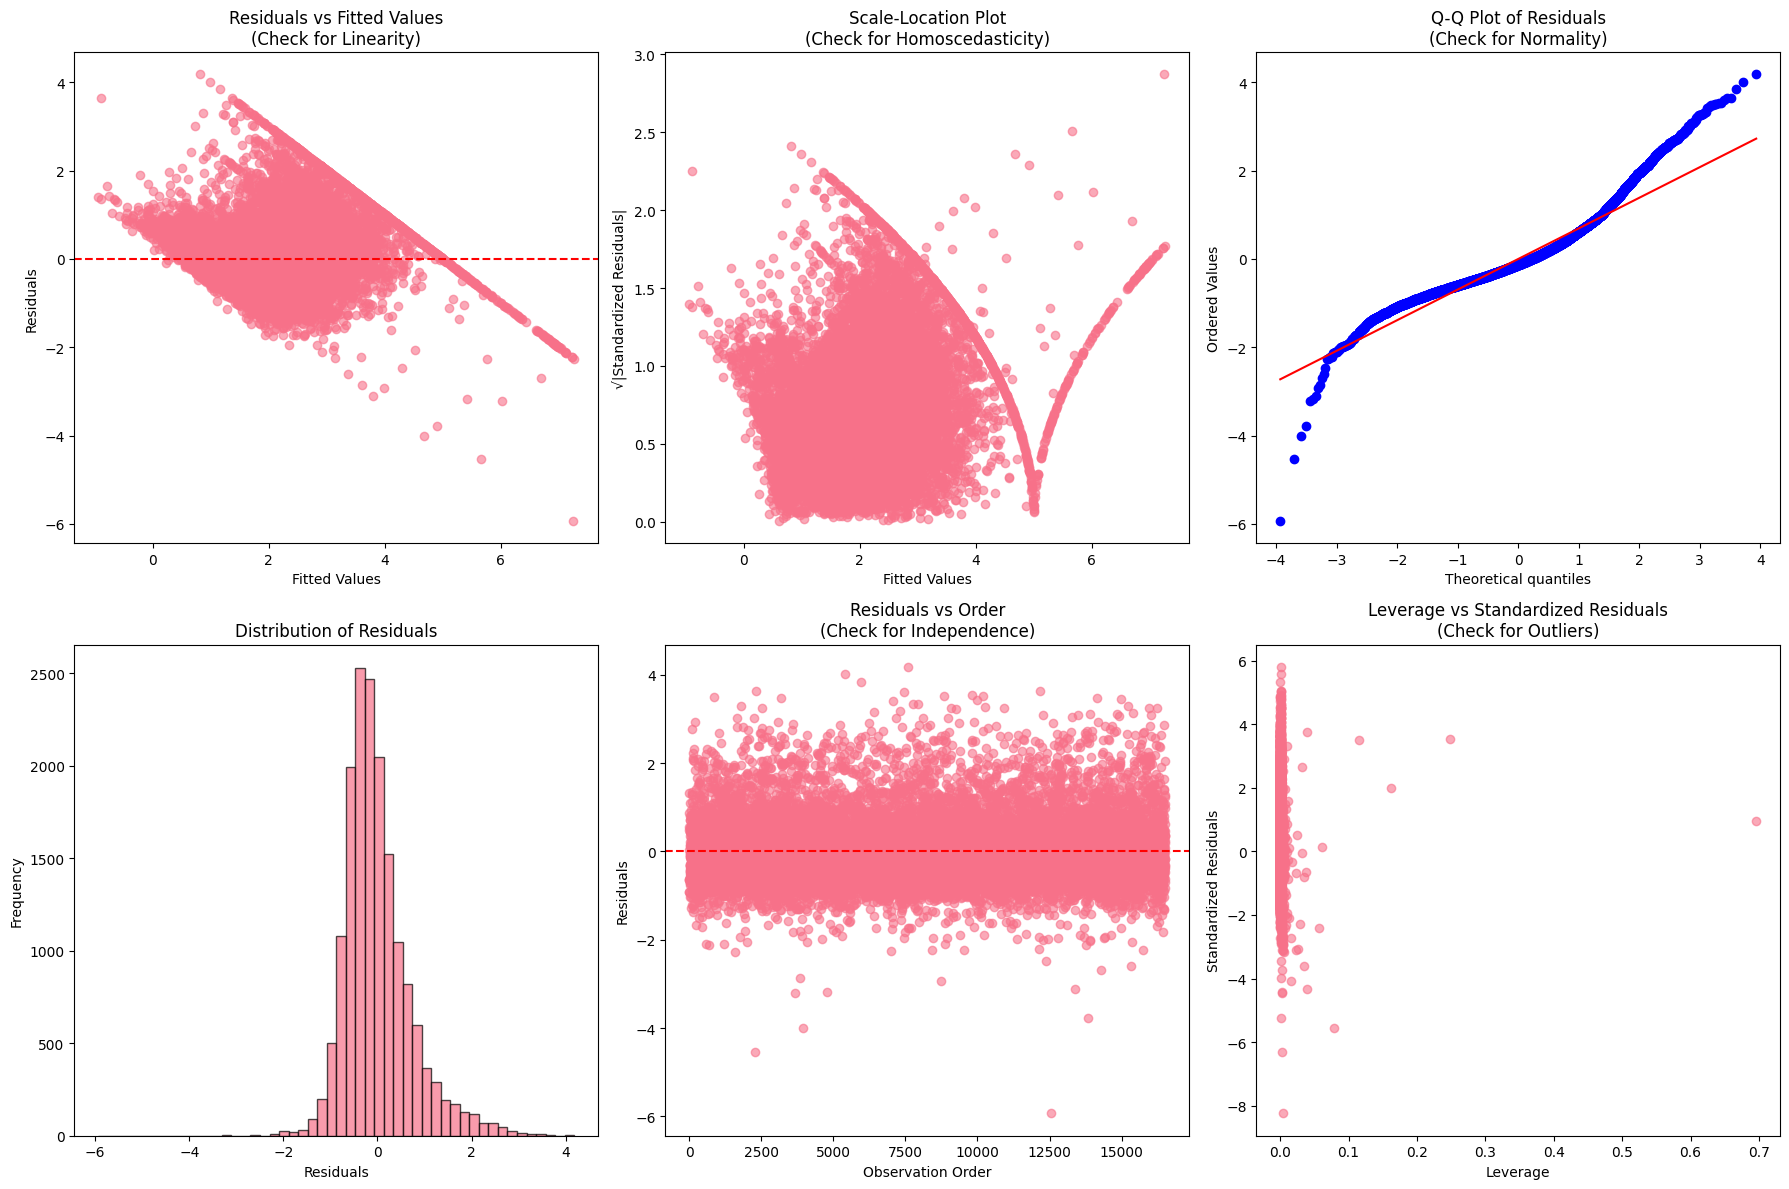

In [ ]:
# ===============================
# 4. CHECK LINEAR REGRESSION ASSUMPTIONS
# ===============================
print("\n" + "="*50)
print("4. CHECKING LINEAR REGRESSION ASSUMPTIONS")
print("="*50)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 4.1 Linearity: Residuals vs Fitted values
axes[0, 0].scatter(y_pred_train, residuals_train, alpha=0.6)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values\n(Check for Linearity)')

# 4.2 Homoscedasticity: Scale-Location plot
standardized_residuals = residuals_train / np.std(residuals_train)
axes[0, 1].scatter(y_pred_train, np.sqrt(np.abs(standardized_residuals)), alpha=0.6)
axes[0, 1].set_xlabel('Fitted Values')
axes[0, 1].set_ylabel('√|Standardized Residuals|')
axes[0, 1].set_title('Scale-Location Plot\n(Check for Homoscedasticity)')

# 4.3 Normality: Q-Q plot of residuals
stats.probplot(residuals_train, dist="norm", plot=axes[0, 2])
axes[0, 2].set_title('Q-Q Plot of Residuals\n(Check for Normality)')

# 4.4 Normality: Histogram of residuals
axes[1, 0].hist(residuals_train, bins=50, alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')

# 4.5 Independence: Residuals vs Order (using index as proxy)
axes[1, 1].scatter(range(len(residuals_train)), residuals_train, alpha=0.6)
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_xlabel('Observation Order')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Order\n(Check for Independence)')

# 4.6 Outliers: Leverage vs Residuals
# Calculate leverage (hat values)
X_train_with_intercept = np.column_stack([np.ones(X_train_scaled.shape[0]), X_train_scaled])
hat_matrix = X_train_with_intercept @ np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) @ X_train_with_intercept.T
leverage = np.diag(hat_matrix)

axes[1, 2].scatter(leverage, standardized_residuals, alpha=0.6)
axes[1, 2].set_xlabel('Leverage')
axes[1, 2].set_ylabel('Standardized Residuals')
axes[1, 2].set_title('Leverage vs Standardized Residuals\n(Check for Outliers)')

plt.tight_layout()
plt.show()

In [ ]:
# ===============================
# 5. STATISTICAL TESTS FOR ASSUMPTIONS
# ===============================
print("\n" + "="*50)
print("5. STATISTICAL TESTS FOR ASSUMPTIONS")
print("="*50)

# Test for normality of residuals
shapiro_stat, shapiro_p = stats.shapiro(residuals_train[:5000])  # Use sample for performance
print(f"Shapiro-Wilk test for normality:")
print(f"  Statistic: {shapiro_stat:.4f}")
print(f"  P-value: {shapiro_p:.4f}")
print(f"  Interpretation: {'Residuals are normally distributed' if shapiro_p > 0.05 else 'Residuals are NOT normally distributed'}")

# Jarque-Bera test for normality
jb_stat, jb_p = stats.jarque_bera(residuals_train)
print(f"\nJarque-Bera test for normality:")
print(f"  Statistic: {jb_stat:.4f}")
print(f"  P-value: {jb_p:.4f}")
print(f"  Interpretation: {'Residuals are normally distributed' if jb_p > 0.05 else 'Residuals are NOT normally distributed'}")

# Breusch-Pagan test for homoscedasticity (simplified implementation)
def breusch_pagan_test(residuals, fitted_values):
    """Simplified Breusch-Pagan test for homoscedasticity"""
    # Regress squared residuals on fitted values
    residuals_squared = residuals ** 2
    bp_stat = len(residuals) * np.corrcoef(fitted_values, residuals_squared)[0, 1] ** 2
    bp_p = 1 - stats.chi2.cdf(bp_stat, df=1)
    return bp_stat, bp_p

bp_stat, bp_p = breusch_pagan_test(residuals_train, y_pred_train)
print(f"\nBreusch-Pagan test for homoscedasticity:")
print(f"  Statistic: {bp_stat:.4f}")
print(f"  P-value: {bp_p:.4f}")
print(f"  Interpretation: {'Homoscedasticity assumption met' if bp_p > 0.05 else 'Heteroscedasticity detected'}")



5. STATISTICAL TESTS FOR ASSUMPTIONS
Shapiro-Wilk test for normality:
  Statistic: 0.9360
  P-value: 0.0000
  Interpretation: Residuals are NOT normally distributed

Jarque-Bera test for normality:
  Statistic: 9371.4658
  P-value: 0.0000
  Interpretation: Residuals are NOT normally distributed

Breusch-Pagan test for homoscedasticity:
  Statistic: 486.9558
  P-value: 0.0000
  Interpretation: Heteroscedasticity detected



6. MODEL SUMMARY AND FEATURE IMPORTANCE
Feature Importance (by coefficient magnitude):
      Feature  Coefficient  Abs_Coefficient
6    Latitude    -0.896929         0.896929
7   Longitude    -0.869842         0.869842
0      MedInc     0.854383         0.854383
3   AveBedrms     0.339259         0.339259
2    AveRooms    -0.294410         0.294410
1    HouseAge     0.122546         0.122546
5    AveOccup    -0.040829         0.040829
4  Population    -0.002308         0.002308


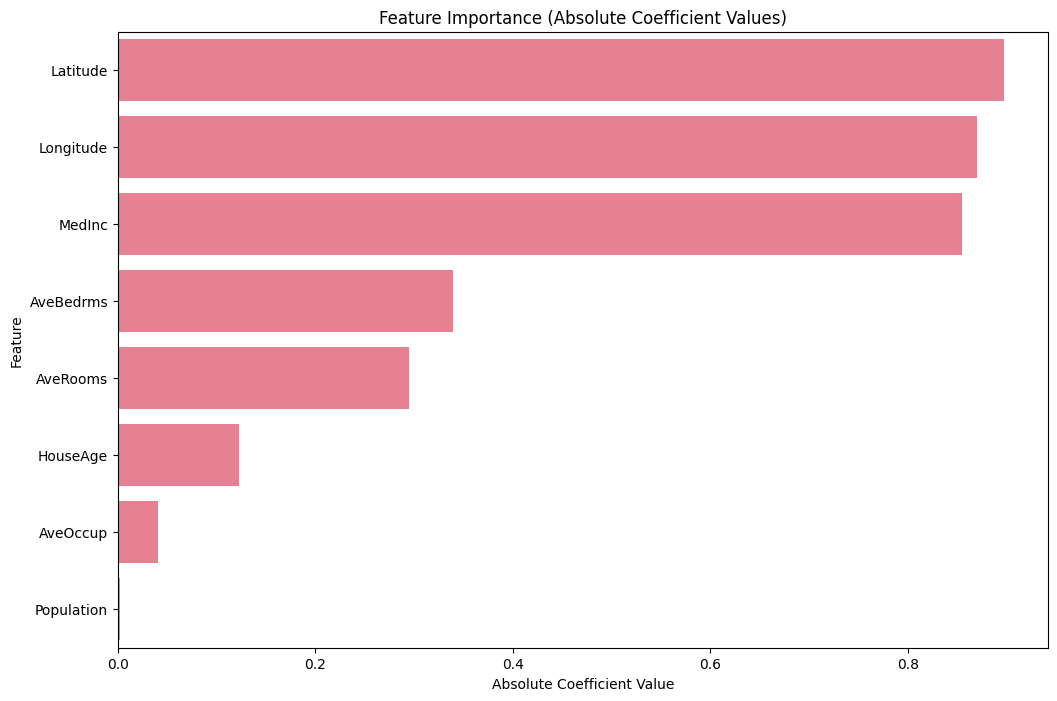


Model Performance:
  Training RMSE: 0.7197
  Test RMSE: 0.7456
  Training MAE: 0.5286
  Test MAE: 0.5332

7. RECOMMENDATIONS FOR MODEL IMPROVEMENT
1. NON-LINEARITY: Consider polynomial features or interaction terms
2. HETEROSCEDASTICITY: Try log transformation of target variable
3. NON-NORMALITY: Apply Box-Cox transformation to residuals
4. OUTLIERS: Consider robust regression methods (Huber, RANSAC)
5. FEATURE ENGINEERING: Create new features from existing ones
6. REGULARIZATION: Use Ridge or Lasso regression to prevent overfitting
7. ALTERNATIVE MODELS: Try Random Forest, Gradient Boosting, or SVR

Analysis complete! The dataset has been thoroughly explored and assumptions checked.


In [ ]:




# ===============================
# 6. FEATURE IMPORTANCE AND MODEL SUMMARY
# ===============================
print("\n" + "="*50)
print("6. MODEL SUMMARY AND FEATURE IMPORTANCE")
print("="*50)

# Feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': housing.feature_names,
    'Coefficient': lr_model.coef_,
    'Abs_Coefficient': np.abs(lr_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("Feature Importance (by coefficient magnitude):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance, x='Abs_Coefficient', y='Feature')
plt.title('Feature Importance (Absolute Coefficient Values)')
plt.xlabel('Absolute Coefficient Value')
plt.show()

# Model performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f"\nModel Performance:")
print(f"  Training RMSE: {train_rmse:.4f}")
print(f"  Test RMSE: {test_rmse:.4f}")
print(f"  Training MAE: {train_mae:.4f}")
print(f"  Test MAE: {test_mae:.4f}")

# ===============================
# 7. RECOMMENDATIONS
# ===============================
print("\n" + "="*50)
print("7. RECOMMENDATIONS FOR MODEL IMPROVEMENT")
print("="*50)

recommendations = [
    "1. NON-LINEARITY: Consider polynomial features or interaction terms",
    "2. HETEROSCEDASTICITY: Try log transformation of target variable",
    "3. NON-NORMALITY: Apply Box-Cox transformation to residuals",
    "4. OUTLIERS: Consider robust regression methods (Huber, RANSAC)",
    "5. FEATURE ENGINEERING: Create new features from existing ones",
    "6. REGULARIZATION: Use Ridge or Lasso regression to prevent overfitting",
    "7. ALTERNATIVE MODELS: Try Random Forest, Gradient Boosting, or SVR"
]

for rec in recommendations:
    print(rec)

print("\nAnalysis complete! The dataset has been thoroughly explored and assumptions checked.")
